In [19]:
""""Import from Keras and Tensorflow"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [8]:
test = pd.df = pd.read_csv("test.csv")
train = pd.df = pd.read_csv("train.csv")

NameError: name 'X' is not defined

In [20]:
"""Split into x train and x val"""
y = train["label"]
y
x = train.drop("label", axis=1)
X_train,X_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=42)
"""Convert x to tensor"""
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
"""Convert y to tensor"""
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)




In [34]:
"""Define model"""
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation=relu))
model.add(Dense(128, activation=relu))
model.add(Dense(64, activation=relu))
model.add(Dense(10))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
"""Plot loss"""

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7776 - loss: 3.8609 - val_accuracy: 0.8994 - val_loss: 0.4099
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9249 - loss: 0.2795 - val_accuracy: 0.9310 - val_loss: 0.2902
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9451 - loss: 0.1920 - val_accuracy: 0.9336 - val_loss: 0.2722
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9535 - loss: 0.1617 - val_accuracy: 0.9392 - val_loss: 0.2303
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9596 - loss: 0.1297 - val_accuracy: 0.9482 - val_loss: 0.1847
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9687 - loss: 0.1030 - val_accuracy: 0.9539 - val_loss: 0.1864
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9687 - loss: 0.1071 - val_accuracy: 0.9570 - val_loss: 0.1827
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9751 - loss: 0.0842 - 

'Plot loss'

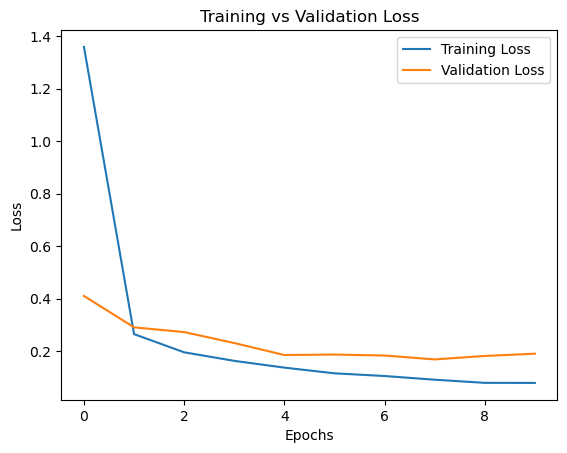

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss over epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [46]:
input_data = X_train[2].numpy().reshape(1, -1)  # Reshape to [1, 784] (batch size of 1)
true_label = y_train[2]
predictions = model(input_data)
probabilities = tf.nn.softmax(predictions)
print(tf.argmax(probabilities, axis=1).numpy()[0])
print(true_label)

3
tf.Tensor(3.0, shape=(), dtype=float32)


In [50]:
X_val

<tf.Tensor: shape=(8400, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

Sample 2000:
True label: 7.0, Predicted label: 7
Prediction probabilities: [3.1162177e-09 8.7886263e-13 1.3181068e-08 2.6001426e-10 1.6631135e-05
 1.2688700e-21 7.0870660e-09 9.9998212e-01 3.4823648e-09 1.1343725e-06]


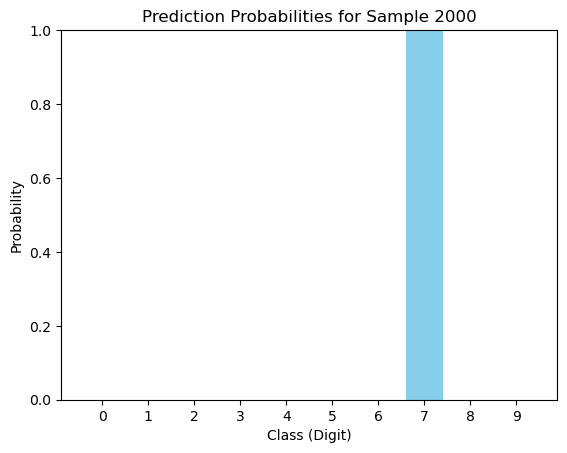

Sample 4655:
True label: 4.0, Predicted label: 4
Prediction probabilities: [4.2058507e-04 2.4871128e-02 2.4684505e-03 6.4884155e-04 6.7876244e-01
 3.9158748e-03 2.6170281e-04 7.3870402e-03 1.8200383e-02 2.6306355e-01]


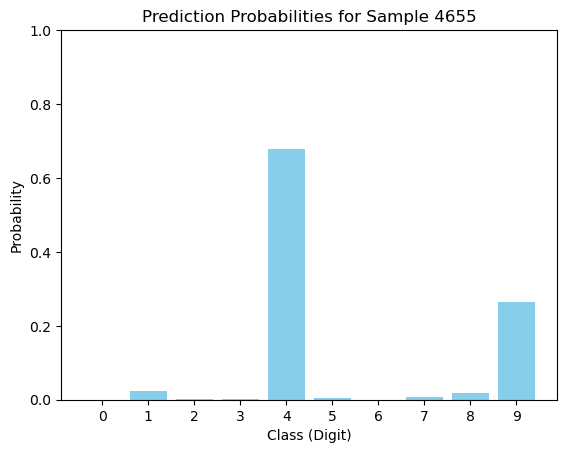

Sample 196:
True label: 4.0, Predicted label: 9
Prediction probabilities: [3.1342159e-05 4.6291607e-05 7.8228168e-06 3.2812455e-05 2.3448308e-01
 6.2000043e-05 1.7915462e-06 5.7790615e-04 6.4896340e-05 7.6469207e-01]


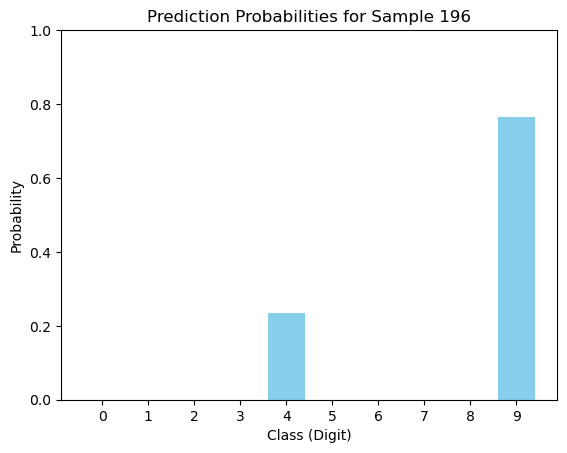

Sample 1347:
True label: 0.0, Predicted label: 0
Prediction probabilities: [9.9998593e-01 5.0503451e-26 1.9893751e-06 2.0598446e-08 4.8266747e-06
 3.4084928e-07 6.7711971e-06 2.8990510e-08 1.4501575e-07 3.2195767e-11]


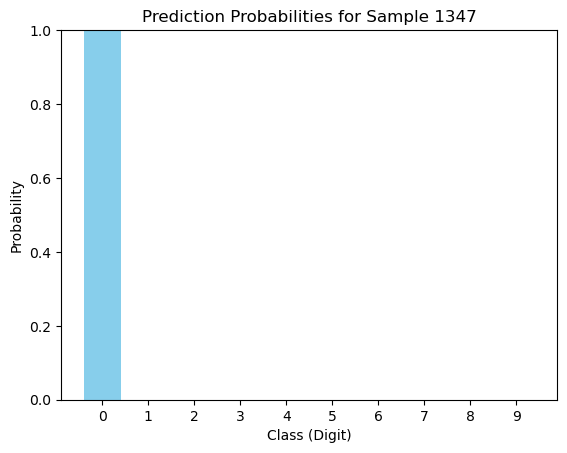

Sample 6574:
True label: 9.0, Predicted label: 9
Prediction probabilities: [2.4647866e-07 2.3216549e-09 1.8877082e-09 1.2830756e-05 1.0459536e-06
 2.1802871e-06 8.4692938e-12 1.0162646e-06 2.4241544e-07 9.9998248e-01]


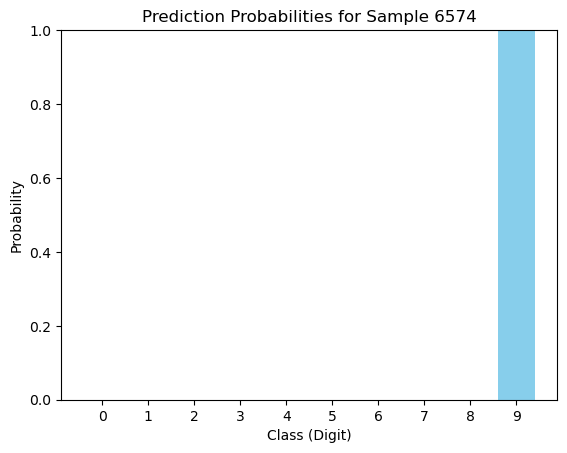

Sample 2165:
True label: 6.0, Predicted label: 6
Prediction probabilities: [8.6467762e-06 1.1098348e-11 7.5547842e-07 1.3735492e-10 9.1085221e-06
 2.6957101e-05 9.9994588e-01 2.4995847e-13 8.6624414e-06 2.2619564e-15]


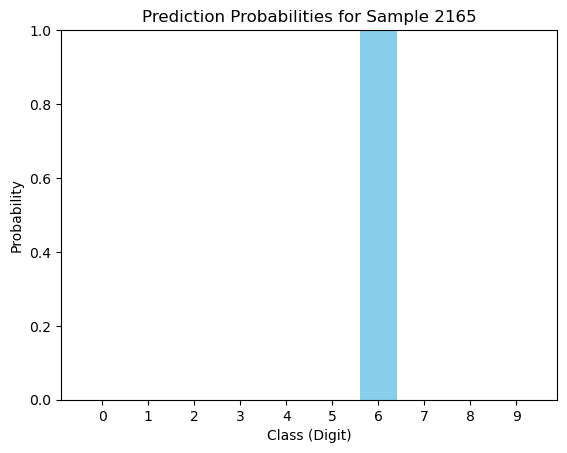

Sample 4830:
True label: 2.0, Predicted label: 2
Prediction probabilities: [8.7683707e-13 6.9420266e-14 9.9999976e-01 1.2257540e-07 7.0732938e-13
 1.7331322e-15 3.3675019e-13 2.3084096e-08 1.3062899e-07 5.2939681e-16]


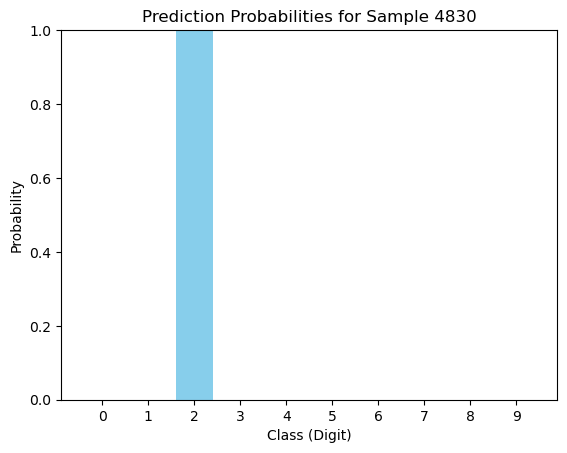

Sample 7366:
True label: 5.0, Predicted label: 5
Prediction probabilities: [5.9111600e-12 2.6796327e-08 7.7950046e-10 3.8365066e-05 4.6779204e-13
 9.9996030e-01 1.9002628e-07 1.1555903e-12 2.3433716e-07 8.9918814e-07]


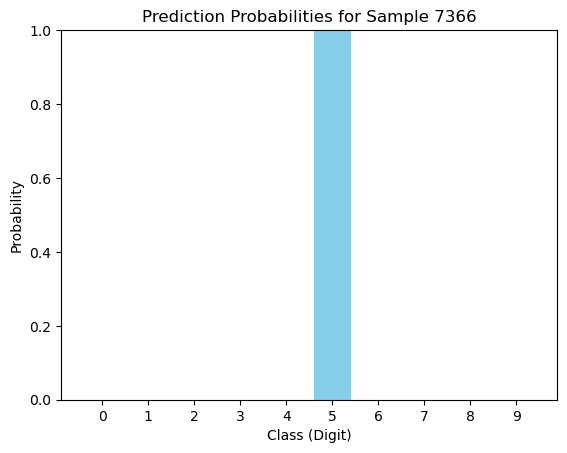

Sample 3927:
True label: 1.0, Predicted label: 1
Prediction probabilities: [4.7226026e-15 9.9868053e-01 3.5300781e-07 4.7239617e-08 3.8421898e-05
 1.8657156e-09 3.0282749e-16 1.2712106e-03 4.1680987e-06 5.2638929e-06]


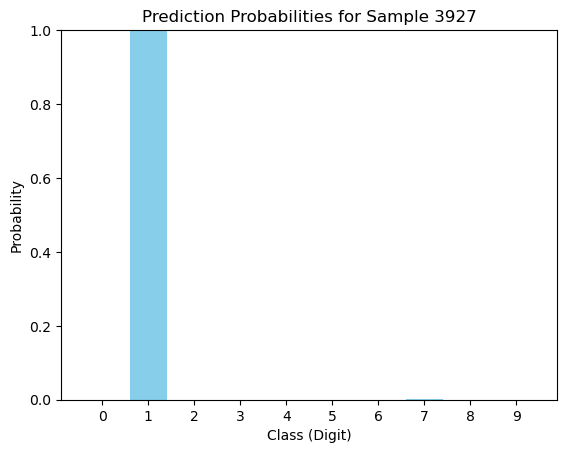

Sample 2920:
True label: 1.0, Predicted label: 1
Prediction probabilities: [6.2083614e-20 9.9998713e-01 8.0517552e-08 4.4532196e-09 9.1474749e-07
 1.7094679e-09 3.0850557e-16 1.1843025e-05 7.6582457e-10 2.8863562e-10]


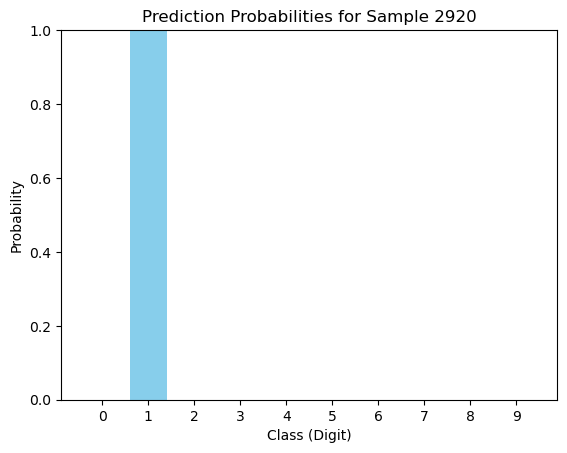

In [51]:
indices = np.random.randint(0, len(X_val), 10)

# Loop through each randomly selected index
for index in indices:
    # Select the input data for the current index and reshape it
    input_data = X_val[index].numpy().reshape(1, -1)  # Reshape to [1, 784]
    true_label = y_val[index]  # Assuming y_val is your corresponding label tensor
    
    # Make a prediction
    predictions = model(input_data)  # Forward pass through the model

    # Apply softmax to get probabilities
    probabilities = tf.nn.softmax(predictions)

    # Get the predicted class (index of highest probability)
    predicted_class = tf.argmax(probabilities, axis=1).numpy()[0]

    # Print the results for this sample
    print(f"Sample {index}:")
    print(f"True label: {true_label}, Predicted label: {predicted_class}")
    print(f"Prediction probabilities: {probabilities.numpy().flatten()}")
    
    # Visualize the prediction probabilities for each class
    classes = np.arange(10)  # Digits 0-9
    probabilities = probabilities.numpy().flatten()  # Flatten the probabilities
    
    # Create a bar plot for the prediction probabilities
    plt.bar(classes, probabilities, color='skyblue')
    plt.title(f"Prediction Probabilities for Sample {index}")
    plt.xlabel("Class (Digit)")
    plt.ylabel("Probability")
    plt.xticks(classes)
    plt.ylim(0, 1)
    plt.show()


